In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
file_path = 'C:/Users/amit_/Downloads/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/ObesityDataset_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)
print(data.head())


# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)  # If all values are zero, proceed without imputation

# Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

# Scale numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Split the dataset into features and target variable
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the preprocessed data
data.head()


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,2,0,-0.013073,0,-1.188039,0.561997,3,3,1
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,2,1,1.618759,1,2.339750,-1.080625,2,3,1
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,2,0,-0.013073,0,1.163820,0.561997,1,3,1
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,2,0,-0.013073,0,1.163820,-1.080625,1,4,5
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,2,0,-0.013073,0,-1.188039,-1.080625,2,3,6


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss
from sklearn.preprocessing import OneHotEncoder

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)

# One-hot encode the true labels for MSE calculation
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_test_one_hot = one_hot_encoder.fit_transform(y_test.values.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) for the probabilities
mse = mean_squared_error(y_test_one_hot, y_pred_proba)
print(f'Mean Squared Error: {mse}')

# Optionally, evaluate the model using other metrics
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# One-hot encode the true labels for log-loss calculation
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_test_one_hot = one_hot_encoder.fit_transform(y_test.values.reshape(-1, 1))

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate Log-loss
logloss = log_loss(y_test_one_hot, y_pred_proba)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Log-loss: {logloss}')

Mean Squared Error: 0.03098523982497677
Accuracy: 0.8747044917257684
Precision: 0.8797072419559763
Recall: 0.8747044917257684
F1-Score: 0.8714461603169272
Log-loss: 0.4117724920264107


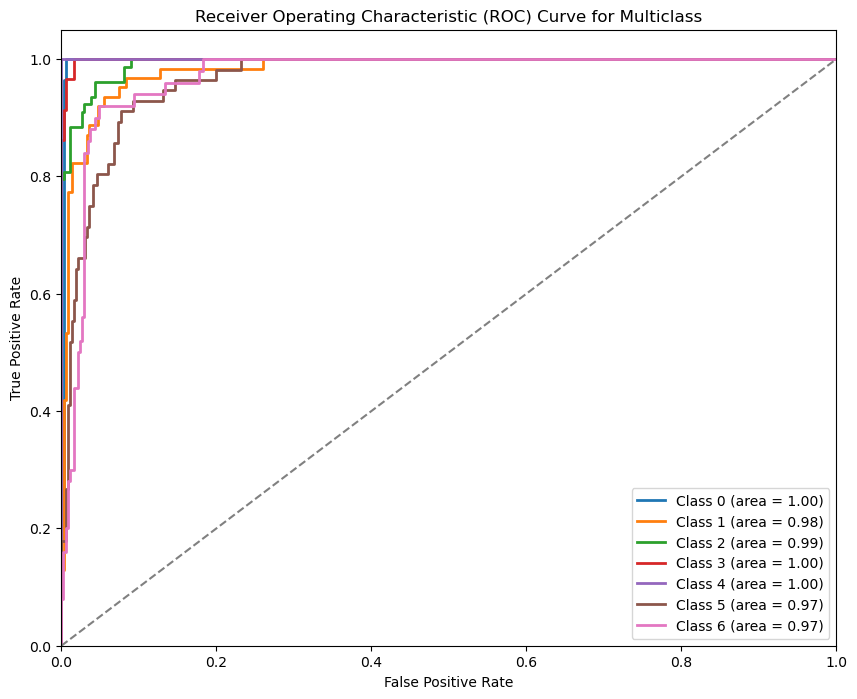

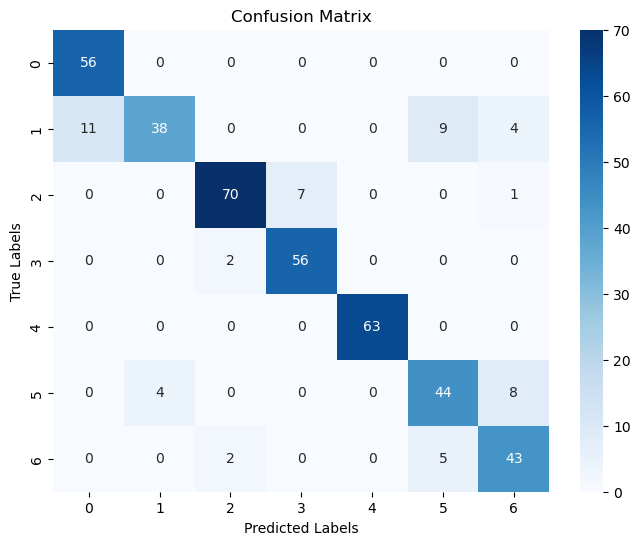

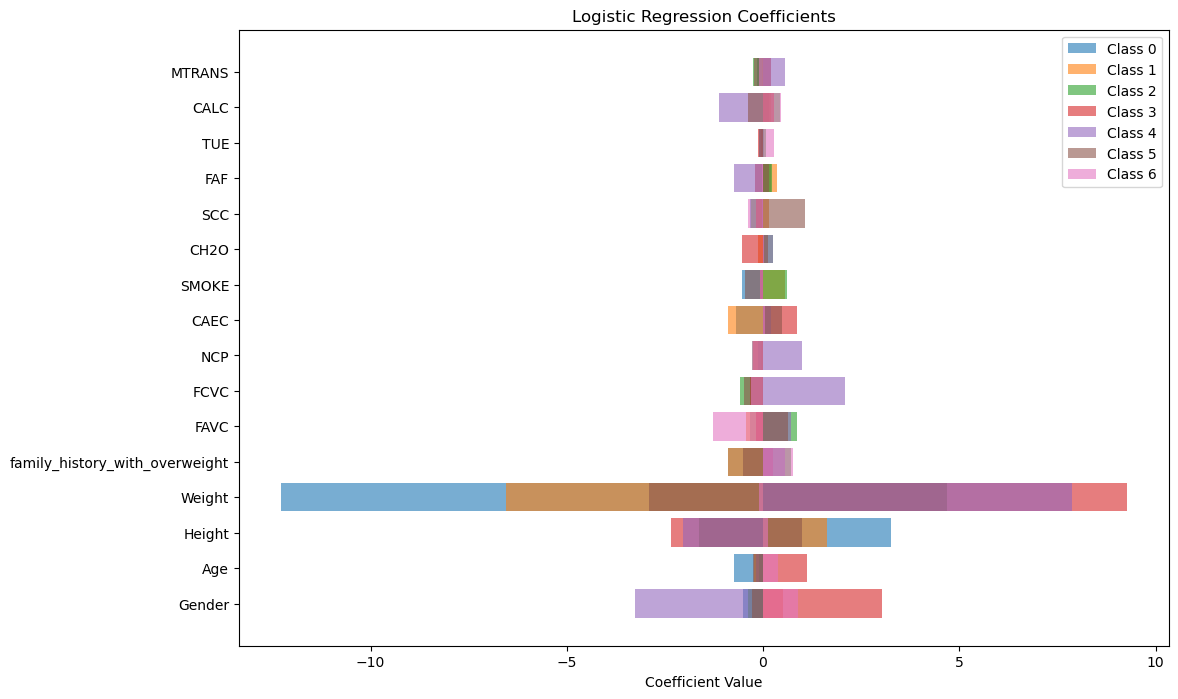

In [16]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Binarize the output for multiclass ROC AUC computation
n_classes = len(np.unique(y))
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Feature names for the coefficients plot
feature_names = X.columns

# Coefficients Plot
coefficients = model.coef_
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.barh(feature_names, coefficients[i], alpha=0.6, label=f'Class {i}')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.legend()
plt.show()


